In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from pylab import cm
import pandas as pd

import matplotlib.font_manager as fm
font_names = [f.name for f in fm.fontManager.ttflist]

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 3)
print(colors(1))

from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def block(x): 
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)


def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)


In [3]:
bf22_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_5.0_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf22_0_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_0.5_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf22_0_05 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_0.05_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf22_0_005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_0.005_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf22_0_0005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_0.0005_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf22_0_00005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_5.0e-5_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf22_0_000005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_5.0e-6_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")


In [4]:
bf22 = [bf22_5, bf22_0_5, bf22_0_05, bf22_0_005, bf22_0_0005, bf22_0_00005, bf22_0_000005]

energies = [block(sample)[0] for sample in bf22]
variances = [block(sample)[1] for sample in bf22]
acceptances = [acceptance_ratio(sample) for sample in bf22]


df = pd.DataFrame({"MC step-length": [5.0, 0.5, 0.05, 0.005, 0.0005, 0.00005, 0.000005],"Energy" : energies, "Variance" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))

0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999923706054688
0.9999923706054688
0.9999465942382812
\begin{tabular}{rrrr}
\toprule
 MC step-length &    Energy &      Variance &  Acceptance ratio \\
\midrule
       5.000000 &  2.000000 &  4.850584e-16 &          0.999996 \\
       0.500000 &  2.000000 &  1.303018e-14 &          0.999996 \\
       0.050000 &  2.000001 &  2.008501e-13 &          0.999996 \\
       0.005000 &  1.999999 &  1.233319e-14 &          0.999996 \\
       0.000500 &  1.999998 &  5.566682e-16 &          0.999992 \\
       0.000050 &  1.999998 &  2.917921e-18 &          0.999992 \\
       0.000005 &  2.000000 &  7.801345e-20 &          0.999947 \\
\bottomrule
\end{tabular}



In [12]:
is22_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_5.0_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.5_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_05 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.05_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.005_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_0005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.0005_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_00005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_5.0e-5_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is22_0_000005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_5.0e-6_numMCSteps_262144_numDims_2_numParticles_2_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")

is22 = [is22_5, is22_0_5, is22_0_05, is22_0_005, is22_0_0005, is22_0_00005, is22_0_000005]

In [18]:

energies = [block(sample)[0] for sample in is22]
variances = [block(sample)[1] for sample in is22]
acceptances = [acceptance_ratio(sample) for sample in is22]
mc_step_lengths = [5.0, 0.5, 0.05, 0.005, 0.0005, 0.00005, 0.000005]

df = pd.DataFrame({"MC step-length": mc_step_lengths,"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))

0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
\begin{tabular}{rrrr}
\toprule
 MC step-length &    Energy &           Var &  Acceptance ratio \\
\midrule
       5.000000 &  1.997437 &  6.572765e-09 &          0.999996 \\
       0.500000 &  1.999999 &  1.573041e-13 &          0.999996 \\
       0.050000 &  2.000000 &  4.783620e-13 &          0.999996 \\
       0.005000 &  2.000000 &  2.207439e-17 &          0.999996 \\
       0.000500 &  2.000000 &  8.315801e-18 &          0.999996 \\
       0.000050 &  2.000000 &  3.703781e-15 &          0.999996 \\
       0.000005 &  1.999999 &  8.097831e-14 &          0.999996 \\
\bottomrule
\end{tabular}



([<matplotlib.axis.XTick at 0x7f22caa43550>,
 [Text(0, 0, '5.0'),
  Text(0, 0, '0.5'),
  Text(0, 0, '0.05'),
  Text(0, 0, '0.005'),
  Text(0, 0, '0.0005'),
  Text(0, 0, '5e-05'),
  Text(0, 0, '5e-06')])

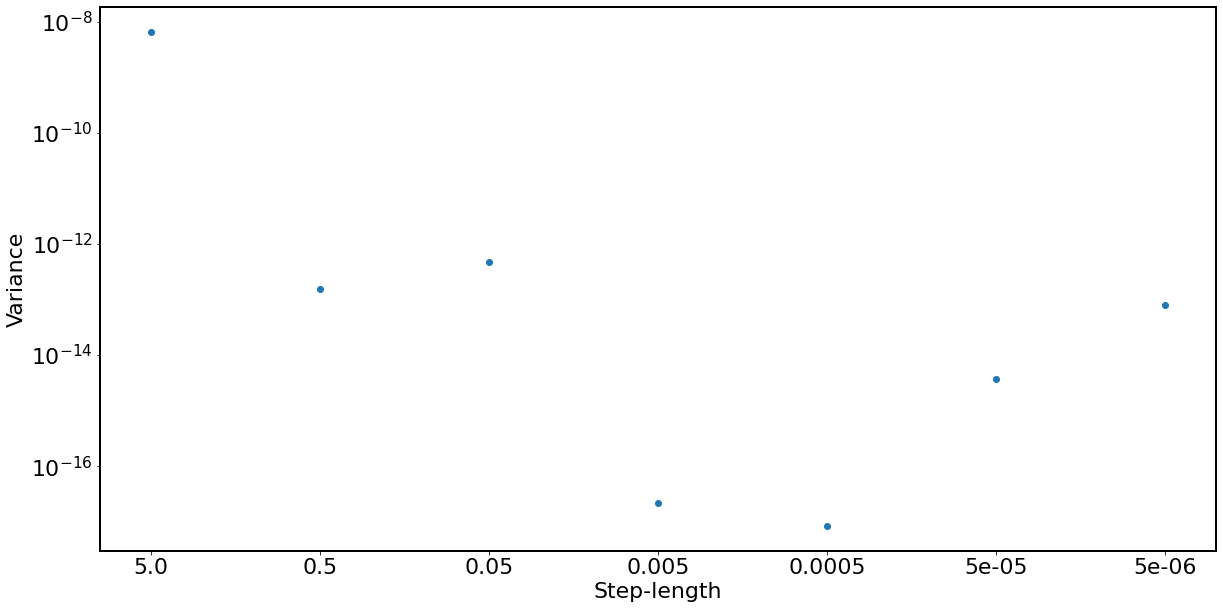

In [42]:
plt.figure(figsize=(20,10))

plt.scatter([0, 1, 2, 3, 4, 5, 6], variances)
plt.yscale("log")
plt.xlabel("Step-length")
plt.ylabel("Variance")
plt.xticks([0, 1, 2, 3, 4, 5, 6], mc_step_lengths)

In [53]:
bf22_energies = []
is22_energies = []

for i in range(len(is22)):
    bf22_energies.append(block(bf22[i])[0])
    is22_energies.append(block(is22[i])[0])

In [54]:
print(is22_energies)
print(bf22_energies)

[1.9974367671487494, 2.0000000000401625, 1.9999998612856058, 2.000000003066068, 1.999999994515015]
[2.000001720766799, 2.000002707031885, 2.000000003197327, 2.000004625664341, 2.000000341410147]


In [57]:
bf62_50 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_50.0_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")

bf62_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_5.0_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf62_0_5 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_0.5_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf62_0_05 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_0.05_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf62_0_005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_0.005_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf62_0_0005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_0.0005_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf62_0_00005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_5.0e-5_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
bf62_0_000005 = np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_bf_stepLength_5.0e-6_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")

bf62 = [bf62_50, bf62_5, bf62_0_5, bf62_0_05, bf62_0_005, bf62_0_0005, bf62_0_00005, bf62_0_000005]

energies = [block(sample)[0] for sample in bf62]
variances = [block(sample)[1] for sample in bf62]
acceptances = [acceptance_ratio(sample) for sample in bf62]
mc_step_lengths = [50.0, 5.0, 0.5, 0.05, 0.005, 0.0005, 0.00005, 0.000005]

df = pd.DataFrame({"MC step-length": mc_step_lengths,"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))




0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999847412109375
0.9999923706054688
0.9999961853027344
\begin{tabular}{rrrr}
\toprule
 MC step-length &     Energy &           Var &  Acceptance ratio \\
\midrule
      50.000000 &  10.000000 &  1.020627e-13 &          0.999996 \\
       5.000000 &  10.000000 &  6.008903e-18 &          0.999996 \\
       0.500000 &  10.000000 &  1.311514e-15 &          0.999996 \\
       0.050000 &  10.000002 &  2.628145e-12 &          0.999996 \\
       0.005000 &   9.999986 &  1.878031e-12 &          0.999996 \\
       0.000500 &   9.999749 &  3.715204e-09 &          0.999985 \\
       0.000050 &   9.999259 &  7.234754e-11 &          0.999992 \\
       0.000005 &   9.999643 &  7.356383e-13 &          0.999996 \\
\bottomrule
\end{tabular}



In [60]:
is62_0_5 =       np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.5_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is62_0_05 =      np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.05_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is62_0_005 =     np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.005_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is62_0_0005 =    np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_0.0005_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is62_0_00005 =   np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_5.0e-5_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is62_0_000005 =  np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_5.0e-6_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")
is62_0_0000005 =  np.loadtxt("../Data/quantumDot/MC/Non_Interacting/wf_slater_gaussian_nn_sysInfo_is_stepLength_5.0e-7_numMCSteps_262144_numDims_2_numParticles_6_elementinfo_slater_none_gaussian_none_nn_numhidden1_12_numhidden2_12_activationFunction_tanH_.txt")

is62 = [is62_0_5, is62_0_05, is62_0_005, is62_0_0005, is62_0_00005, is62_0_000005, is62_0_0000005]

energies = [block(sample)[0] for sample in is62]
variances = [block(sample)[1] for sample in is62]
acceptances = [acceptance_ratio(sample) for sample in is62]
mc_step_lengths = [0.5, 0.05, 0.005, 0.0005, 0.00005, 0.000005, 0.0000005]

df = pd.DataFrame({"MC step-length": mc_step_lengths,"Energy" : energies, "Var" : variances, "Acceptance ratio" : acceptances })
print(df.to_latex(index=False))



0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
0.9999961853027344
\begin{tabular}{rrrr}
\toprule
 MC step-length &     Energy &           Var &  Acceptance ratio \\
\midrule
   5.000000e-01 &  10.140298 &  7.284054e-06 &          0.999996 \\
   5.000000e-02 &  10.000270 &  2.734917e-08 &          0.999996 \\
   5.000000e-03 &  10.000000 &  2.323499e-13 &          0.999996 \\
   5.000000e-04 &  10.000002 &  3.949180e-13 &          0.999996 \\
   5.000000e-05 &  10.000002 &  9.016126e-14 &          0.999996 \\
   5.000000e-06 &  10.000034 &  1.783074e-11 &          0.999996 \\
   5.000000e-07 &  10.000114 &  3.276124e-11 &          0.999996 \\
\bottomrule
\end{tabular}



In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
from pylab import cm
import pandas as pd

import matplotlib.font_manager as fm
font_names = [f.name for f in fm.fontManager.ttflist]

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 3)
print(colors(1))

from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def plot_mcmc_diagnostic(data1, data2, data3, filename):

    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_axes([0,0,0.45,0.2])

    minimum = 1.99
    maximum = 2.04

    ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax2 = fig.add_axes([0,1/3.,0.45,0.2])
    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax3 = fig.add_axes([0.0,2/3.,0.45,0.2])
    ax3.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax1.plot(data1, linewidth=2, color = colors(0))
    ax1.set_xlabel("Iteration", labelpad=10)
    ax1.set_ylabel("Energy (a.u)", labelpad=10)
    ax1.set_title("Trace-plot. MC step-length = 0.05", pad=10)
    # ax1.set_ylim((minimum, maximum))

    ax2.plot(data2, linewidth=2, color = colors(1))
    ax2.set_ylabel("Energy (a.u)", labelpad=10)
    ax2.set_xlabel("Iteration", labelpad=10)
    ax2.set_title("Trace-plot. MC step-length = 0.5", pad=10)
    # ax2.set_ylim((minimum, maximum))


    ax3.plot(data3, linewidth=2, color = colors(2))
    ax3.set_xlabel("Iteration", labelpad=10)
    ax3.set_ylabel("Energy (a.u)", labelpad=10)
    ax3.set_title("Trace-plot. MC step-length = 5.0", pad=10)
    # ax3.set_ylim((minimum, maximum))


    ax4 = fig.add_axes([0.55,0,0.15,0.2])
    ax4.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax4.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax5 = fig.add_axes([0.55,1/3.,0.15,0.2])
    ax5.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax5.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax6 = fig.add_axes([0.55,2/3.,0.15,0.2])
    ax6.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax6.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax4.hist(data1, linewidth=2, color = colors(0), bins=100)
    ax4.set_xlabel("Energy (a.u)", labelpad=10)
    ax4.set_ylabel("Frequency", labelpad=10)
    ax4.set_title("Histogram. MC step-length = 0.05", pad=10)
    ax4.set_xlim((minimum, maximum))


    ax5.hist(data2, linewidth=2, color = colors(1), bins=100)
    ax5.set_xlabel("Energy (a.u)", labelpad=10)
    ax5.set_ylabel("Frequency", labelpad=10)
    ax5.set_title("Histogram. MC step-length = 0.5", pad=10)
    ax5.set_xlim((minimum, maximum))


    ax6.hist(data3, linewidth=2, color = colors(2), bins=100)
    ax6.set_xlabel("Energy (a.u)", labelpad=10)
    ax6.set_ylabel("Frequency", labelpad=10)
    ax6.set_title("Histogram. MC step-length = 5.0", pad=10)
    # ax6.set_xlim(minimum, maximum)

    ax7 = fig.add_axes([0.8,0,0.15,0.2])
    ax7.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax7.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax8= fig.add_axes([0.8,1/3.,0.15,0.2])
    ax8.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # x.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax8.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    ax9 = fig.add_axes([0.8,2/3.,0.15,0.2])
    ax9.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top=False)
    # ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top=True)
    ax9.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    # ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)

    pd.plotting.lag_plot(pd.DataFrame(data1), lag=1, ax = ax7, c=colors(0))
    ax7.set_title("Correlation plot. MC step-length = 0.05", pad=10)
    # ax7.hist(data, linewidth=2, color = colors(0))
    # ax7.set_xlabel("Energy (a.u)", labelpad=10)
    # ax7.set_ylabel("Frequency", labelpad=10)

    pd.plotting.lag_plot(pd.DataFrame(data2), lag=1, ax = ax8, c=colors(1))
    ax8.set_title("Correlation plot. MC step-length = 0.5", pad=10)

    # ax8.hist(data, linewidth=2, color = colors(1))
    # ax8.set_xlabel("Energy (a.u)", labelpad=10)
    # ax8.set_ylabel("Frequency", labelpad=10)

    pd.plotting.lag_plot(pd.DataFrame(data3), lag=1, ax = ax9, c=colors(2))
    ax9.set_title("Correlation plot. MC step-length = 5.0", pad=10)

    # ax9.hist(data, linewidth=2, color = colors(2))
    # ax9.set_xlabel("Energy (a.u)", labelpad=10)
    # ax9.set_ylabel("Frequency", labelpad=10)

    plt.savefig(filename, bbox_inches='tight')

def block(x): 
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0:-1:2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)


def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length

(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
